In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [5]:
# Get only the cubes that have our line of interest in them
mol_tag = 28502
catalog = 'CDMS'
mol_str = f'H_2CN'
cubes, tbl = fetch_cubes(cubefns, catalog=catalog, mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

Beam: BMAJ=1.5257338285446145 arcsec BMIN=1.1981344223022445 arcsec BPA=-81.86238098144531 deg
Beam: BMAJ=1.5312427449996096 arcsec BMIN=1.2319199787635138 arcsec BPA=98.73362706081726 deg
Beam: BMAJ=1.576571238062154 arcsec BMIN=1.2710207774915279 arcsec BPA=94.07396509688701 deg
Beam: BMAJ=1.6586385750872388 arcsec BMIN=1.3085037128270052 arcsec BPA=95.1174545517311 deg
Beam: BMAJ=1.3367647674040788 arcsec BMIN=1.0968126354042624 arcsec BPA=108.4464307711793 deg
Beam: BMAJ=1.492799282073972 arcsec BMIN=1.2847222089767447 arcsec BPA=-60.54604721069336 deg
Beam: BMAJ=1.5394280940274103 arcsec BMIN=1.2412535319537372 arcsec BPA=95.33295543272975 deg
Beam: BMAJ=1.322135448455808 arcsec BMIN=1.1147061586379976 arcsec BPA=-67.4911880493164 deg
Beam: BMAJ=1.5083903074264524 arcsec BMIN=1.160009026527402 arcsec BPA=-84.7427749633789 deg
Beam: BMAJ=1.334004878997803 arcsec BMIN=1.0842053890228271 arcsec BPA=-75.58486938476562 deg
Beam: BMAJ=1.4934837818145743 arcsec BMIN=1.0927433967590305 ar

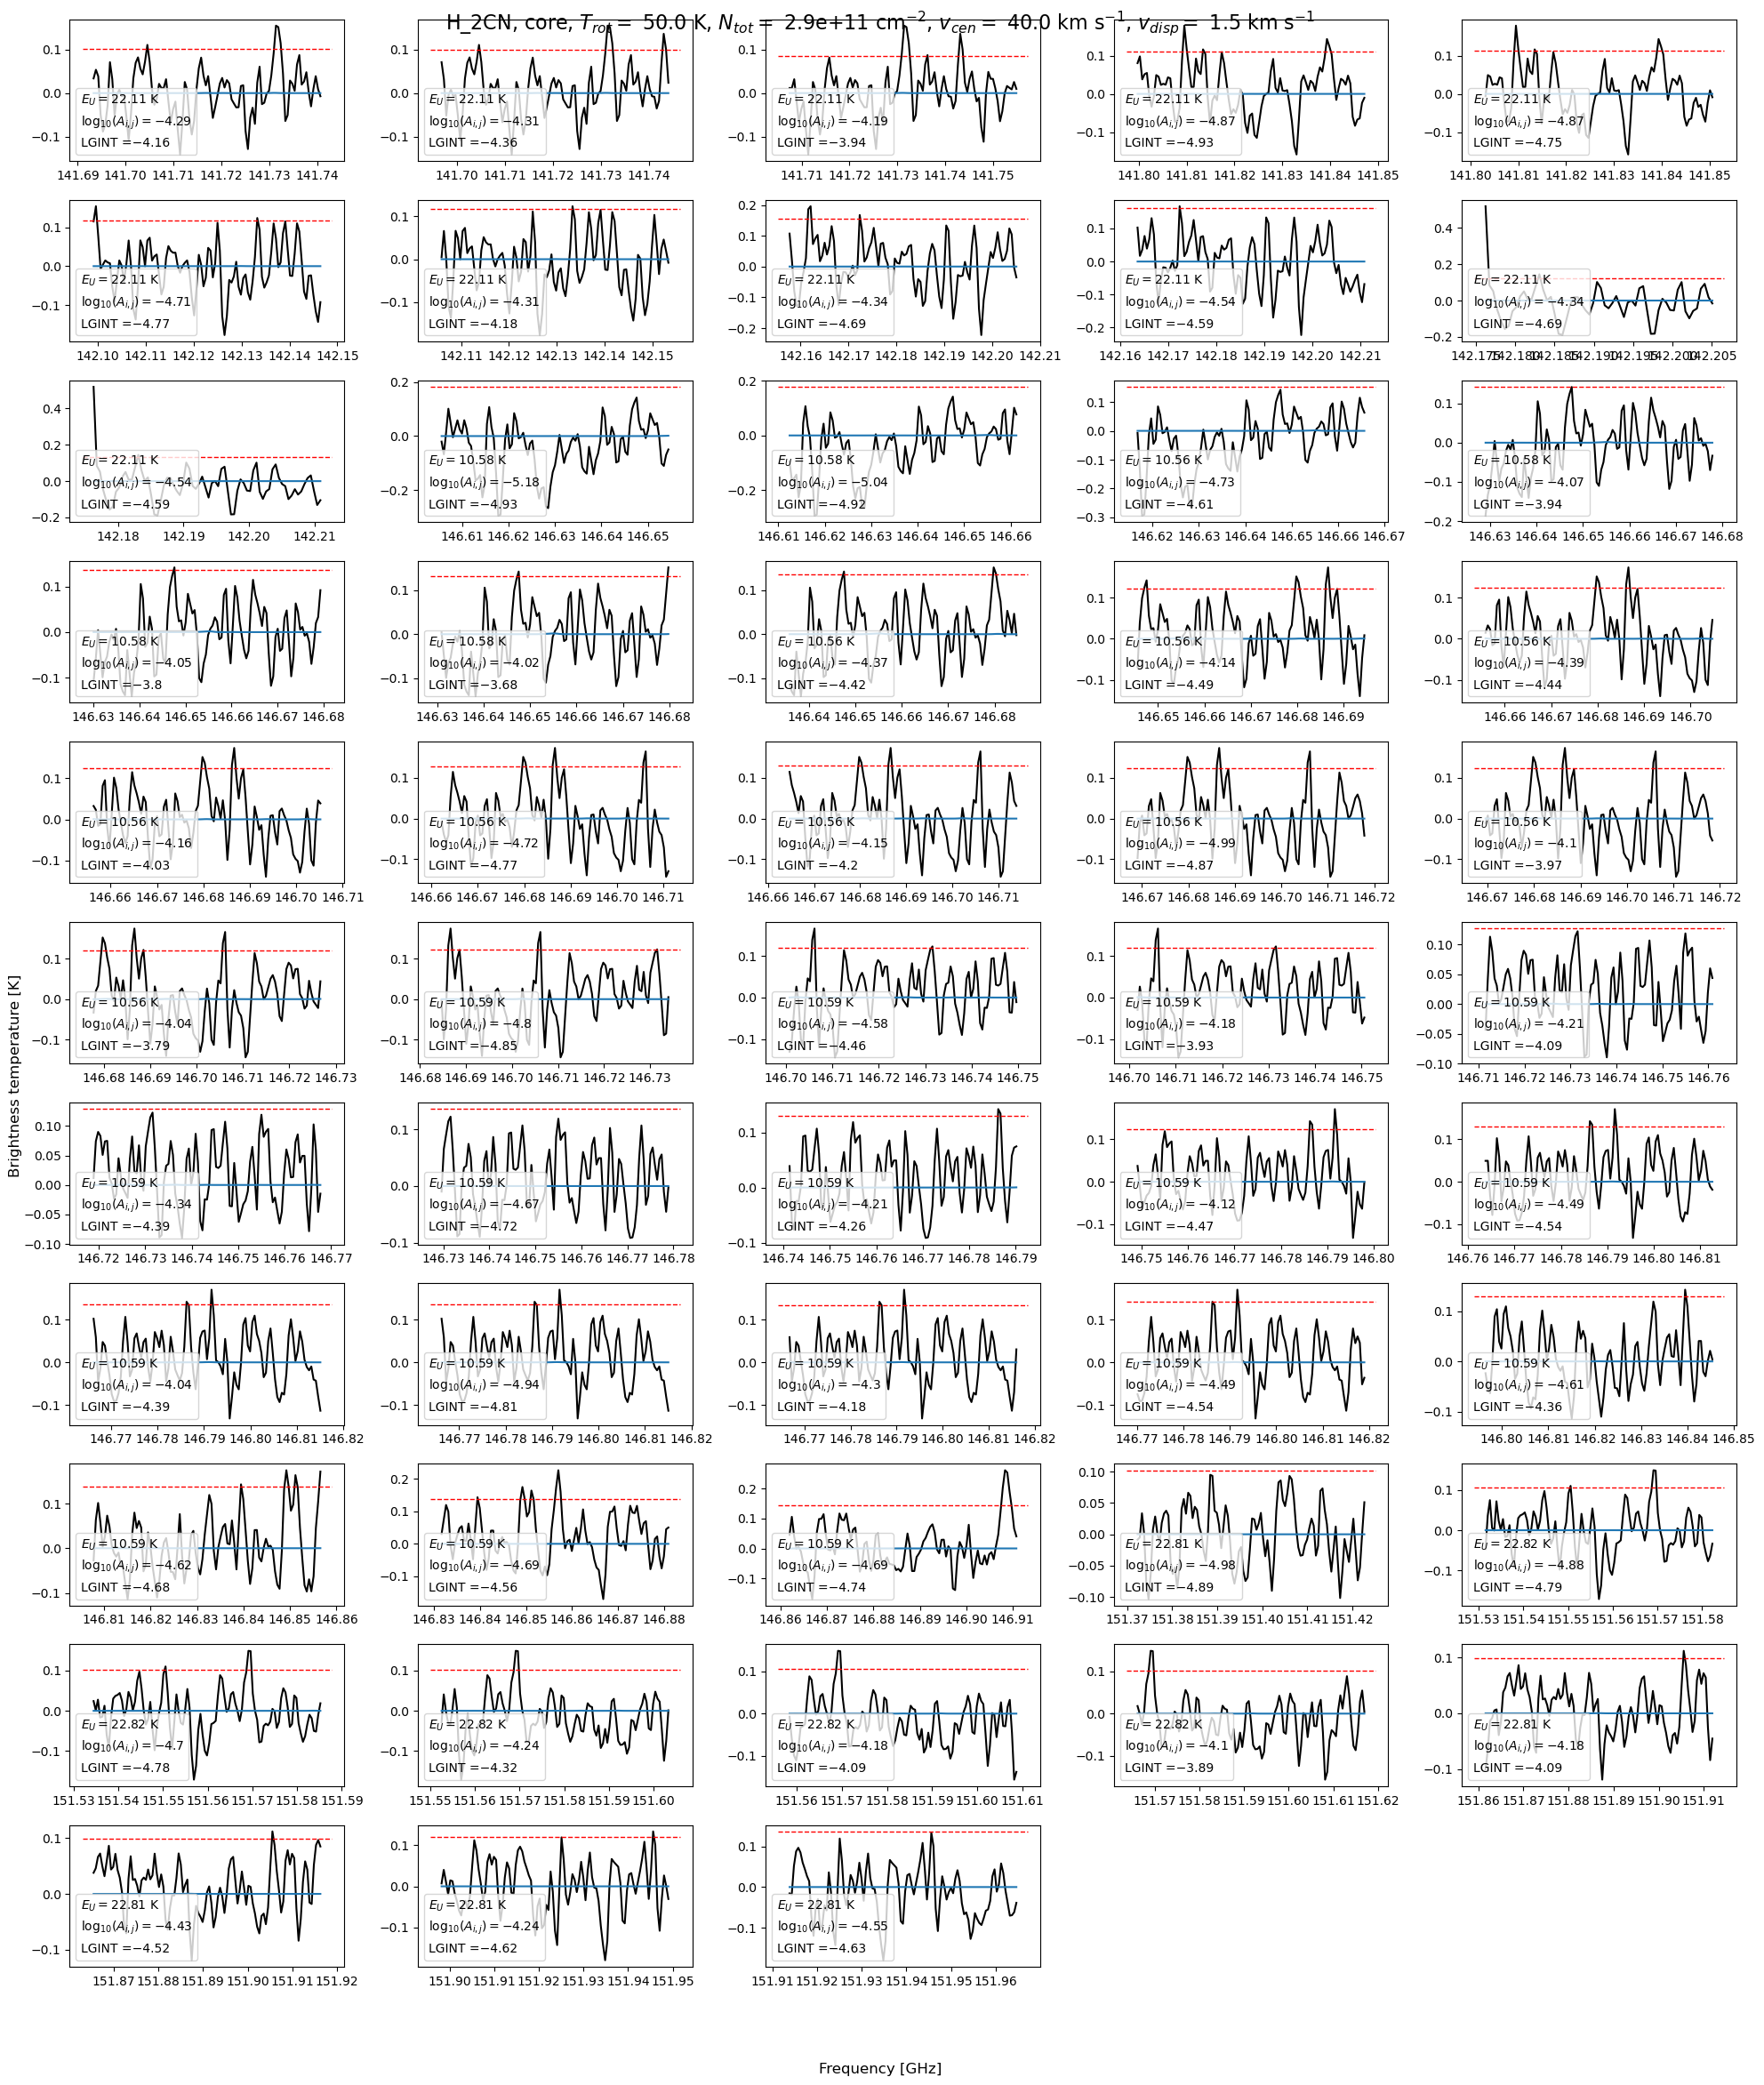

In [12]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 50., N_tot = 2.9e+11, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog=catalog, fig_width=20, fig_height=25,
               nrows=12, ncols=5, parse_loc=False, line_by_line=True, name_for_plot=mol_str, extr_type="coord", crd=crd,
               show_2_sigma=True, LGINT_cutoff=-5)

In [14]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

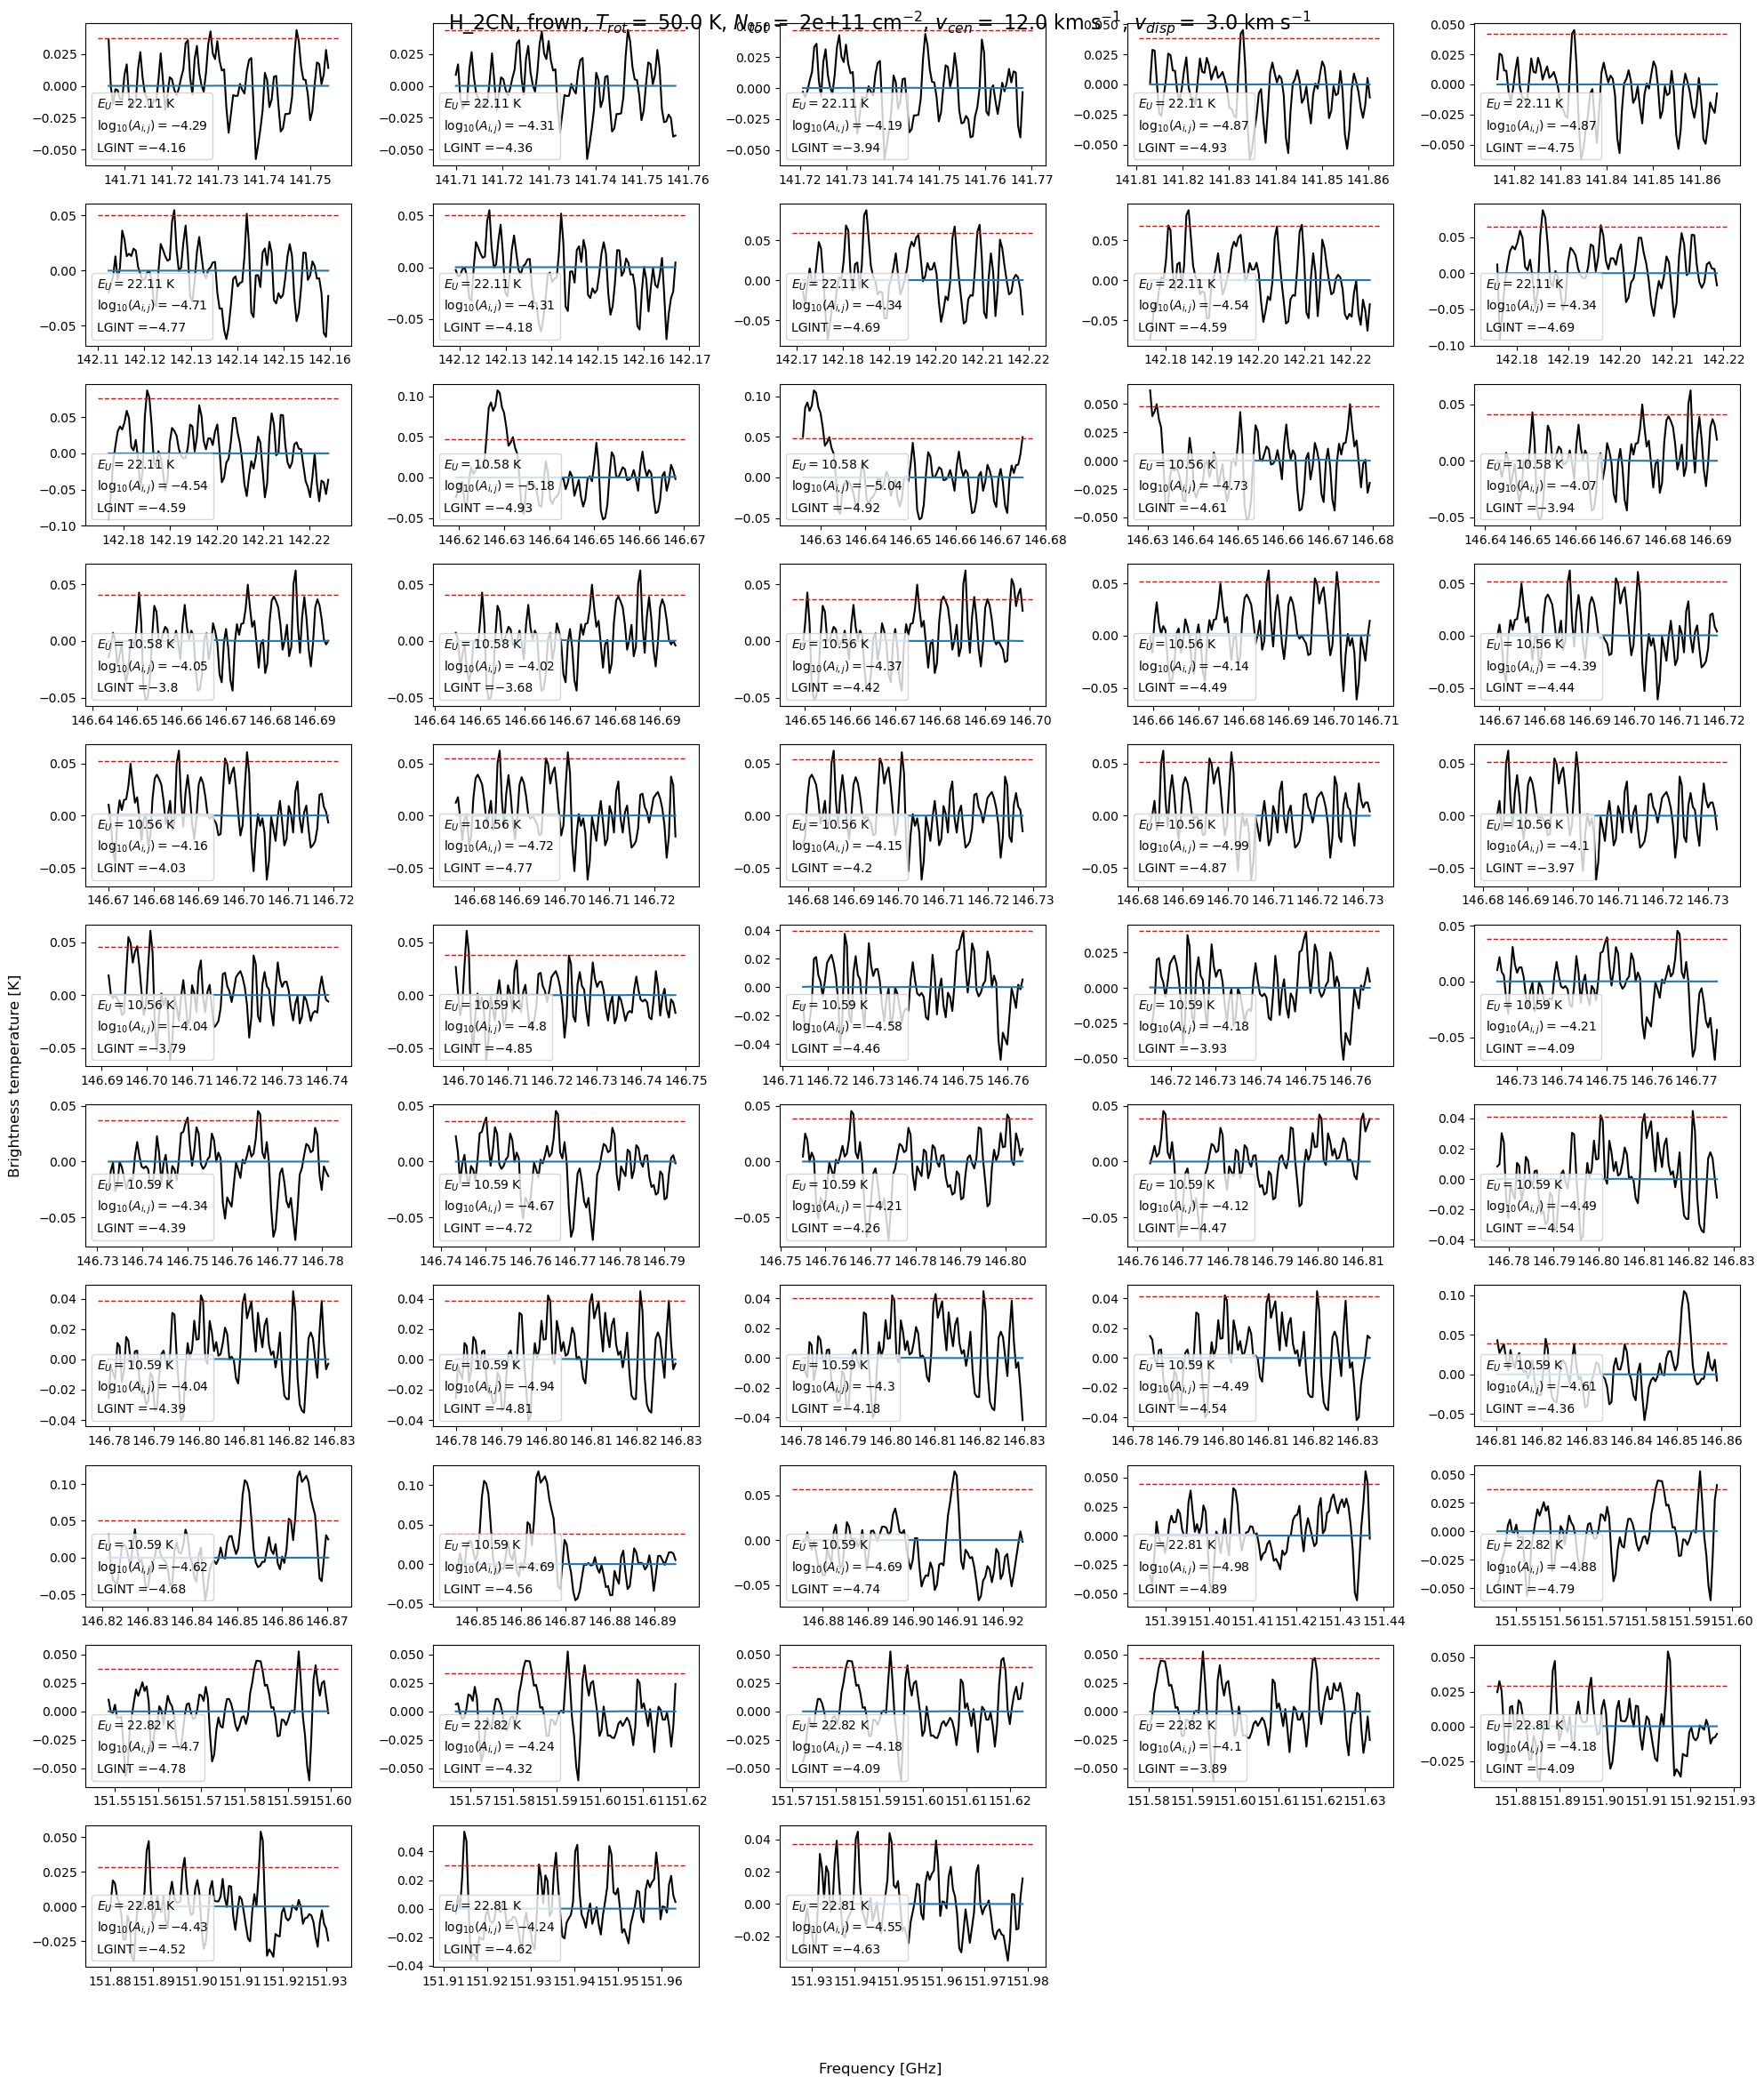

In [15]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 50., N_tot = 2.0e+11, v_cen = 12.*u.km/u.s, v_disp = 3.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog=catalog, fig_width=20, fig_height=25,
                       nrows=12, ncols=5, parse_loc=False, line_by_line=True, name_for_plot=mol_str,
                       extr_type="reg", show_2_sigma=True, return_freqs=True, LGINT_cutoff=-5)

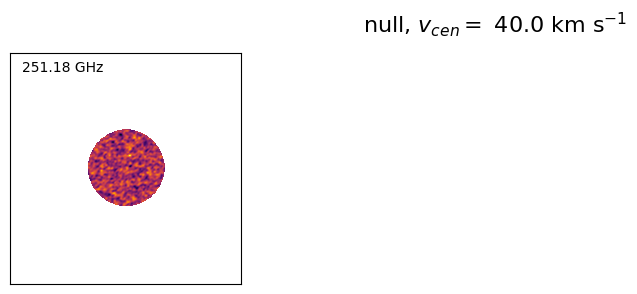

In [12]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40.*u.km/u.s, fig_width=10, fig_height=8, nrows=3, ncols=4, name_for_plot=mol_str)

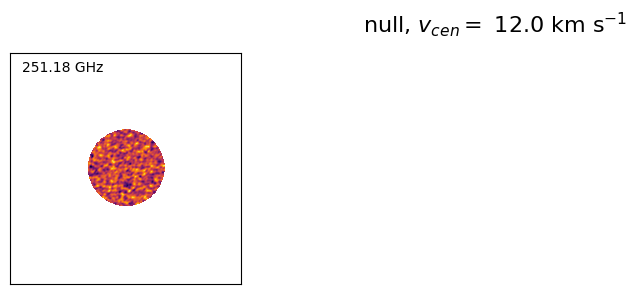

In [13]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=12.*u.km/u.s, fig_width=10, fig_height=8, nrows=3, ncols=4, name_for_plot=mol_str)